Defaulting to user installation because normal site-packages is not writeable


preprocessor_config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.37k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

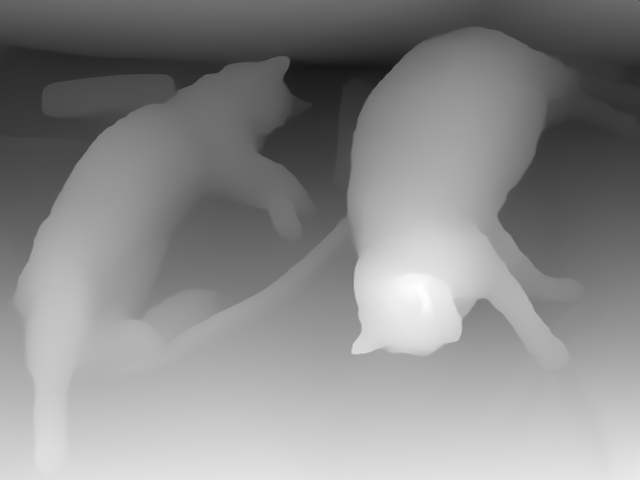

In [1]:
!pip install transformers
from transformers import DPTImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = DPTImageProcessor.from_pretrained("Intel/dpt-beit-large-512")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-beit-large-512")

# prepare image for the model
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth
